# Chapter 4 - Exercises

In [8]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: parallel

rethinking (Version 2.13)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




## 4M1

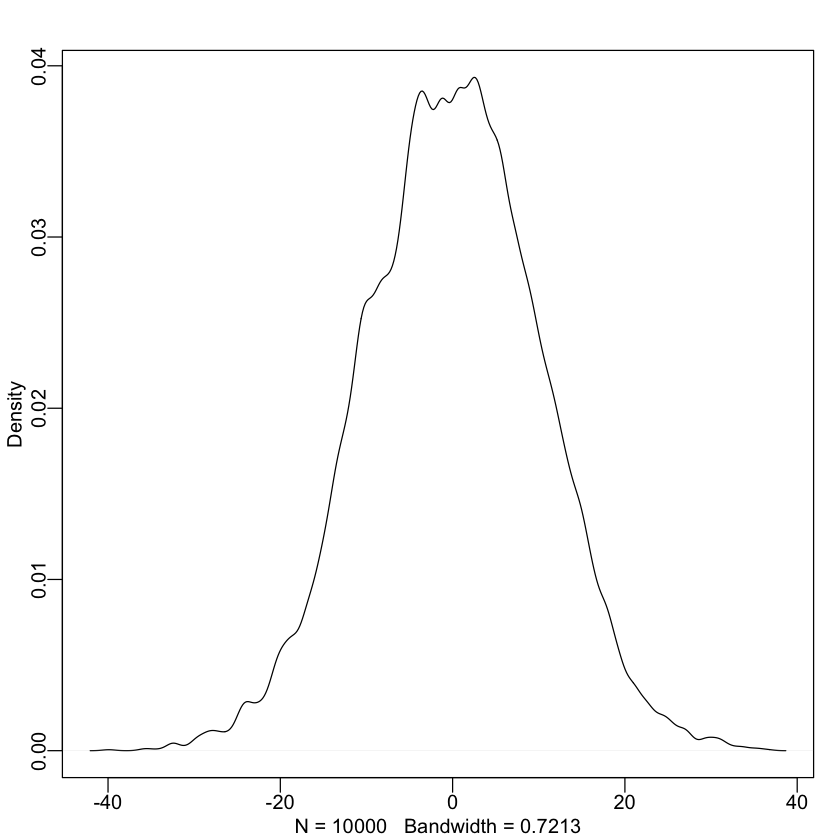

In [9]:
mu = rnorm(1e4, 0, 10)
sigma = rexp(1e4, 1)
y_post_sim <- rnorm(1e4, mu, sigma )
dens(y_post_sim)

## 4M2

The translated formula looks as follows. As d is not defined, you can't execute this code without error.

```
m.4m2 <- quap(
  alist(
    y ~ dnorm(mu, sigma),
    mu ~ dnorm(0, 10),
    sigma ~ dexp(1)
  ), data = d)
```

## 4M4

when we speak of students, we may need to distinguish school pupils and university students. The latter may have no growth at all in consecutive years so for the  purpose of this excercise we assume that we deal with school pupils.

In [10]:
year = seq(0, 2)
N = 1000
a = rnorm(N, 130, 10)
b = rlnorm(N, 2, 0.5)
sigma = runif(N, 0, 1)
mu = a+b*year
h = rnorm(N, mu, sigma)

Warning message in b * year:
“Länge des längeren Objektes
 	 ist kein Vielfaches der Länge des kürzeren Objektes”


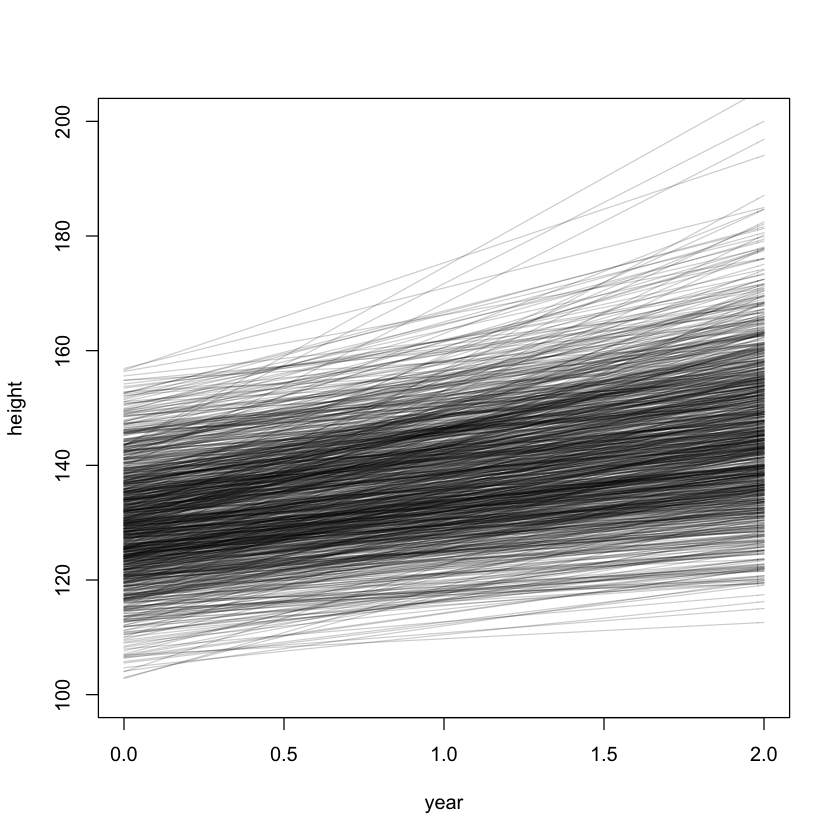

In [11]:
plot( 
  NULL,
  xlim=range(year),
  ylim=c(100,200), 
  xlab="year",
  ylab="height")

for (i in 1:N) curve(a[i]+b[i]*(x),
      from=min(year),
      to=max(year),
      add=TRUE,
      col=col.alpha("black", 0.2))

## 4M7

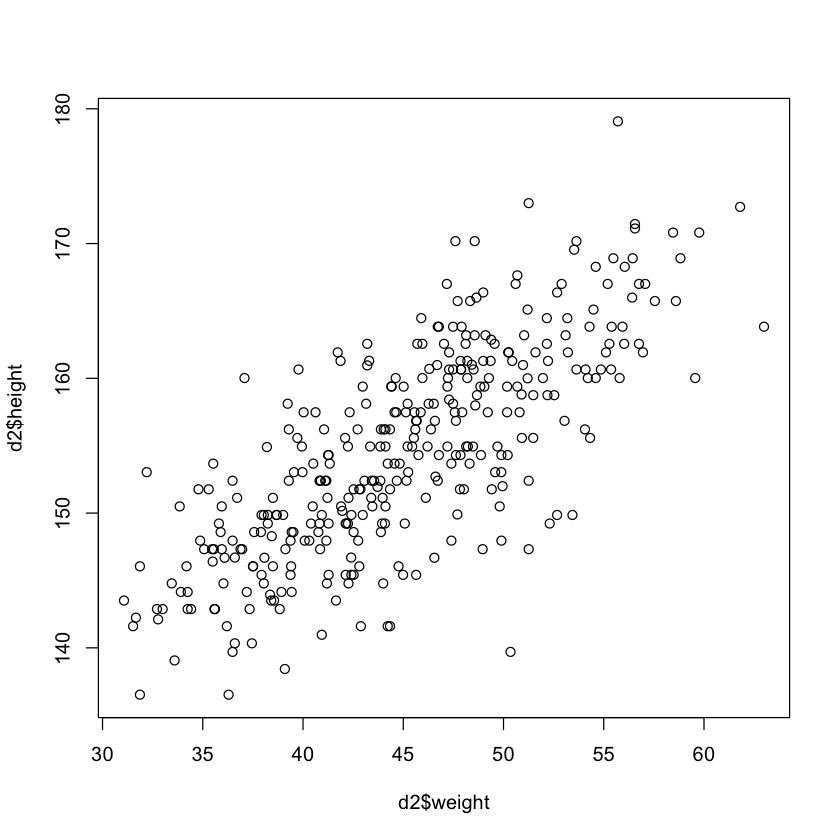

In [12]:
data(Howell1) 
d <- Howell1
d2 <- d[d$age>=18,]
plot (d2$height~d2$weight)

In [13]:
# define the average weight, x-bar
xbar <- mean(d2$weight)

# fit the model including xbar
m4.3 <-quap(
  alist(
    height ~ dnorm(mu,sigma),
    mu <- a+b*(weight-xbar),
    a ~ dnorm(178,20),
    b ~ dlnorm(0,1),
    sigma ~ dunif(0,50)
  ) ,data=d2)

precis(m4.3)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,154.6013464,0.27031207,154.169336,155.0333573
b,0.9032872,0.04192431,0.836284,0.9702903
sigma,5.0719637,0.19116258,4.766449,5.3774784


In [14]:
round(vcov(m4.3),3)

,a,b,sigma
a,0.073,0.000,0.000
b,0.000,0.002,0.000
sigma,0.000,0.000,0.037


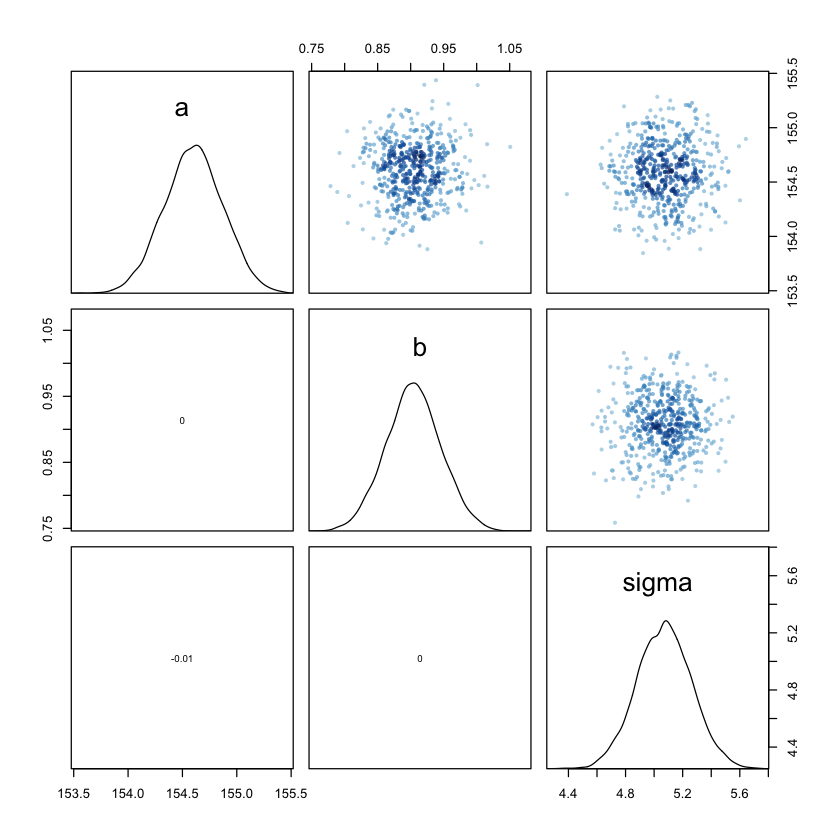

In [15]:
pairs(m4.3)

In [16]:
# fit the model omitting xbar
m4.3_no_xbar <- quap(
  alist(
    height ~ dnorm(mu, sigma),
    mu <- a + b*(weight),
    a ~ dnorm(178,20),
    b ~ dlnorm(0,1),
    sigma ~ dunif(0, 50)
  ), data=d2)

precis(m4.3_no_xbar)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,114.5342337,1.89776436,111.5012398,117.5672277
b,0.8907313,0.04175837,0.8239933,0.9574692
sigma,5.0727657,0.19125335,4.7671059,5.3784255


In [17]:
round(vcov(m4.3_no_xbar), 3)

,a,b,sigma
a,3.602,-0.078,0.009
b,-0.078,0.002,0.000
sigma,0.009,0.000,0.037


In [18]:
# sampling mu from the posterior
post_xbar <- extract.samples(m4.3)
post_no_xbar <- extract.samples(m4.3_no_xbar)

a_xbar <- mean(post_xbar$a)
a_no_xbar <- mean(post_no_xbar$a)

b_xbar <- mean(post_xbar$b)
b_no_xbar <- mean(post_no_xbar$b)

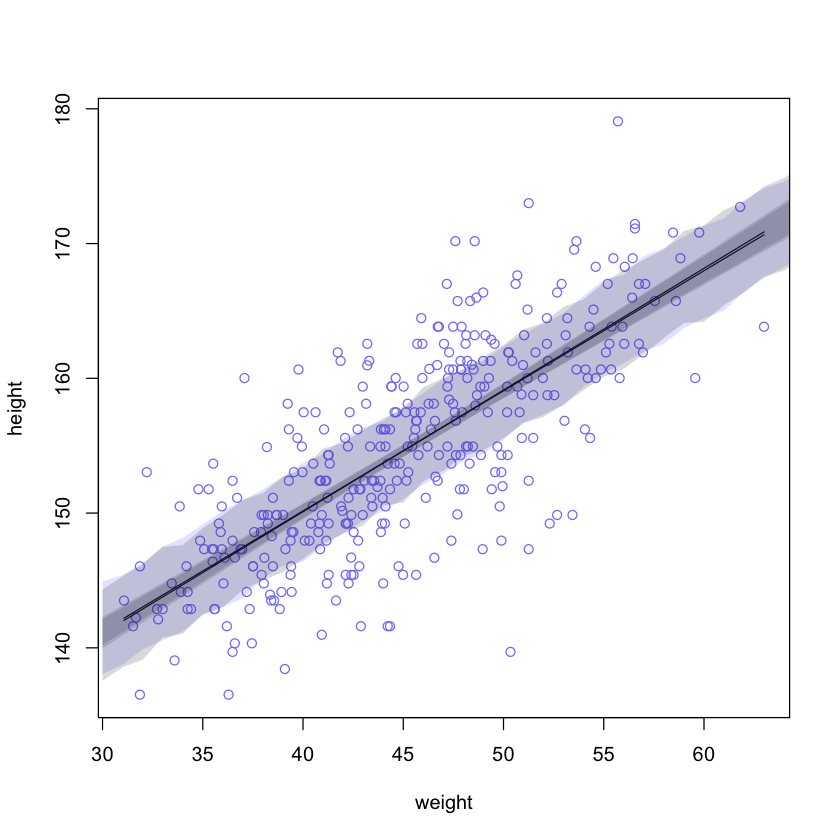

In [86]:
# plotting data and MAPs
plot(height~weight, data=d2, col=rangi2)
curve(a_xbar+b_xbar*(x-xbar), add=TRUE)
curve(a_no_xbar+b_no_xbar*(x), add=TRUE)

# plotting compatibility intervals for the MAPs
weight.seq <- seq(30, 70, by=1)
mu <- link(m4.3, data=data.frame(weight=weight.seq))
mu.PI_xbar <- apply(mu, 2,  PI, prob=.89)
shade(mu.PI_xbar, weight.seq)

mu <- link(m4.3_no_xbar, data=data.frame(weight=weight.seq))
mu.PI_no_xbar <- apply(mu, 2,  PI, prob=.89)
shade(mu.PI_no_xbar, weight.seq)

# simulating data for model with and without xbar
sim.height_xbar <- sim(m4.3, data=list(weight=weight.seq))
sim.height_no_xbar <- sim(m4.3_no_xbar, data=list(weight=weight.seq))

height.PI_xbar <- apply(sim.height_xbar, 2, PI, prob=0.5)
height.PI_no_xbar <- apply(sim.height_no_xbar, 2, PI, prob=0.5)

shade(height.PI_no_xbar, weight.seq, col = col.alpha(rangi2))
shade(height.PI_xbar, weight.seq)

## 4H1

For this exercise, we compute  
1. a point estimate: the MAP for each given a particular weight
2. posterior distributions for heights given a particular weight
3. compatibility intervals for each posterior distribution

In [203]:
weights_new <- data.frame(weight=c(46.95, 43.72, 64.78, 32.59, 54.63))

In [27]:
weights_new$point <- apply(weights_new, 1, function(x) a_xbar + b_xbar * (x-xbar))

In [104]:
post <- extract.samples(m4.3)
weights_new$mu <- lapply(weights_new$weight, function(weight) post$a + post$b *(weight - xbar))
weights_new$pi <- lapply(1:nrow(weights_new), function(x) PI(weights_new$mu[[x]], prob = .89))

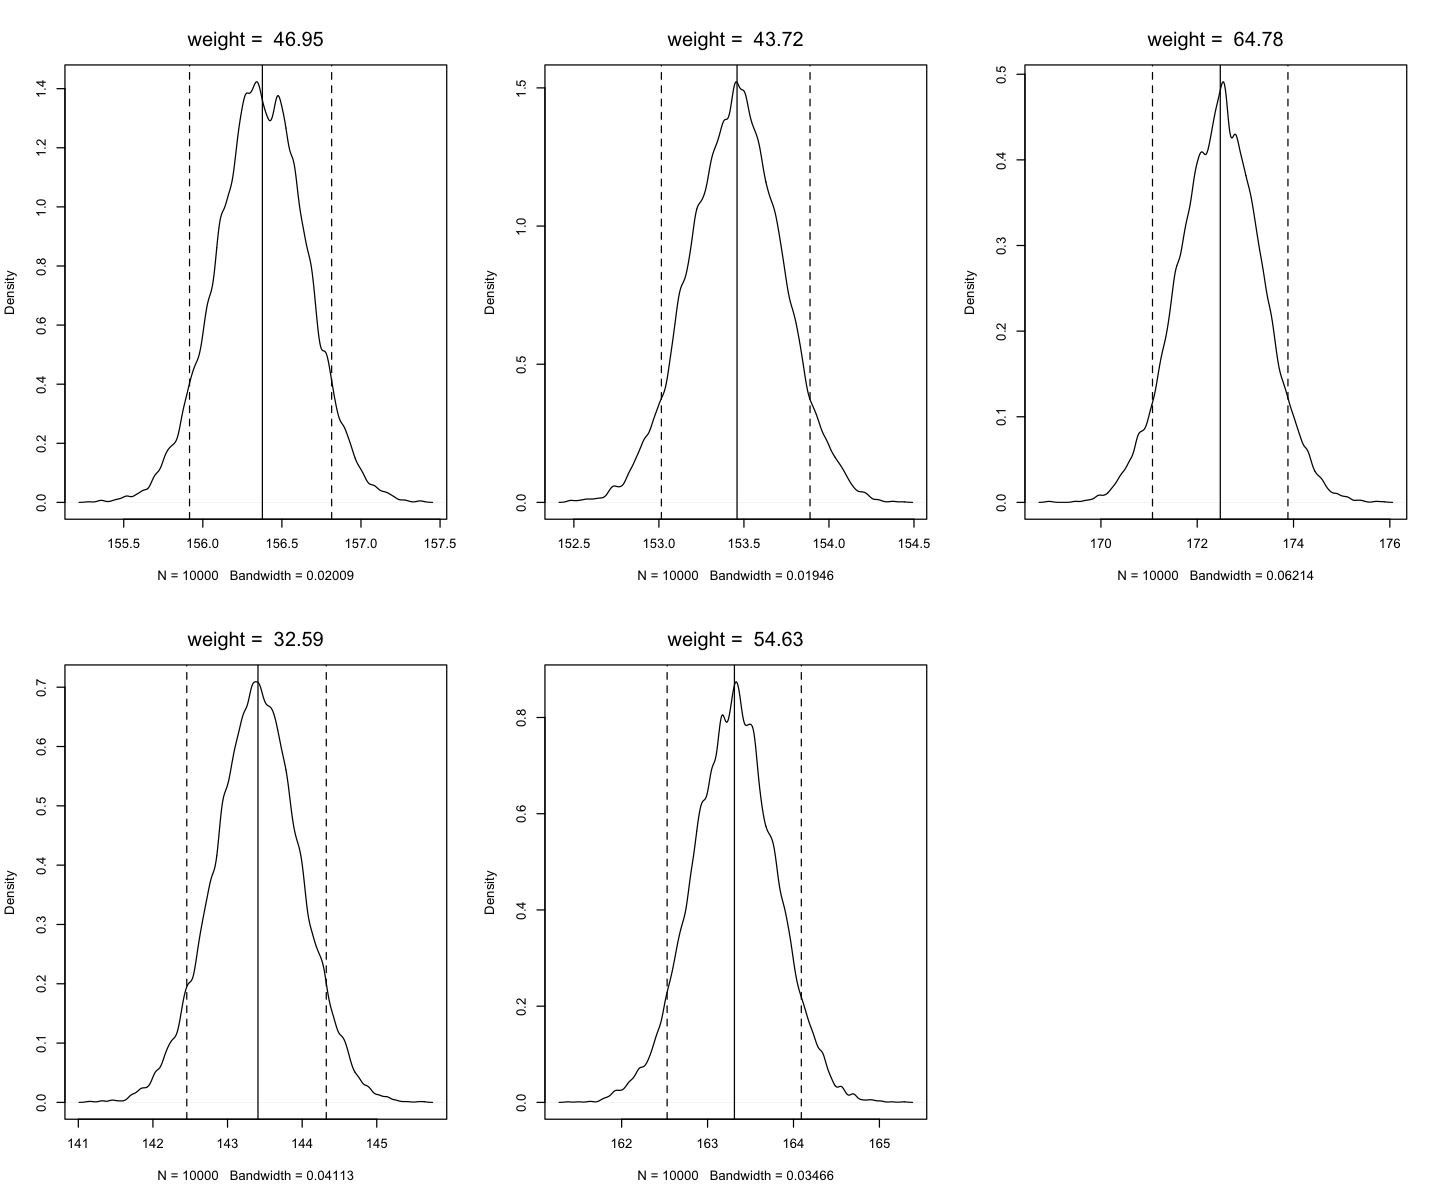

In [137]:
par(mfrow= c(2, 3))
options(repr.plot.width=12, repr.plot.height=10)
for(i in 1:nrow(weights_new)){
    dens(weights_new$mu[[i]])
    abline(v=weights_new$pi[[i]][1], lty=2)
    abline(v=weights_new$pi[[i]][2], lty=2)
    abline(v=weights_new$point[[i]])
    mtext(paste('weight = ',  weights_new$weight[[i]]), line=1)
}

## 4H2

In [143]:
d3 <- d[d$age< 18, ]

In [145]:
nrow(d3)

[1] 192

In [163]:
xbar <- mean(d3$weight)
m.4h2 <- quap(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b*(weight - xbar),
        a ~ dnorm(100, 10),
        b ~ dlnorm(0,1),
        sigma ~ dunif(0,50)
    ), data=d3

)

In [164]:
precis(m.4h2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,108.288124,0.60778576,107.316765,109.259483
b,2.716657,0.06831578,2.607475,2.825839
sigma,8.437213,0.43057097,7.749077,9.125348


In [165]:
post <- extract.samples(m.4h2)
a_map <- mean(post$a)
b_map <- mean(post$b)

In [179]:
weight.seq = seq(0, 50, length.out=100)
mu <- link(m.4h2, data=data.frame(weight=weight.seq))
PI <- apply(mu, 2, PI, prob=0.89)

In [183]:
pred <- sim(m.4h2, data=list(weight=weight.seq))
pred.PI <- apply(pred, 2, PI, prob=0.89)

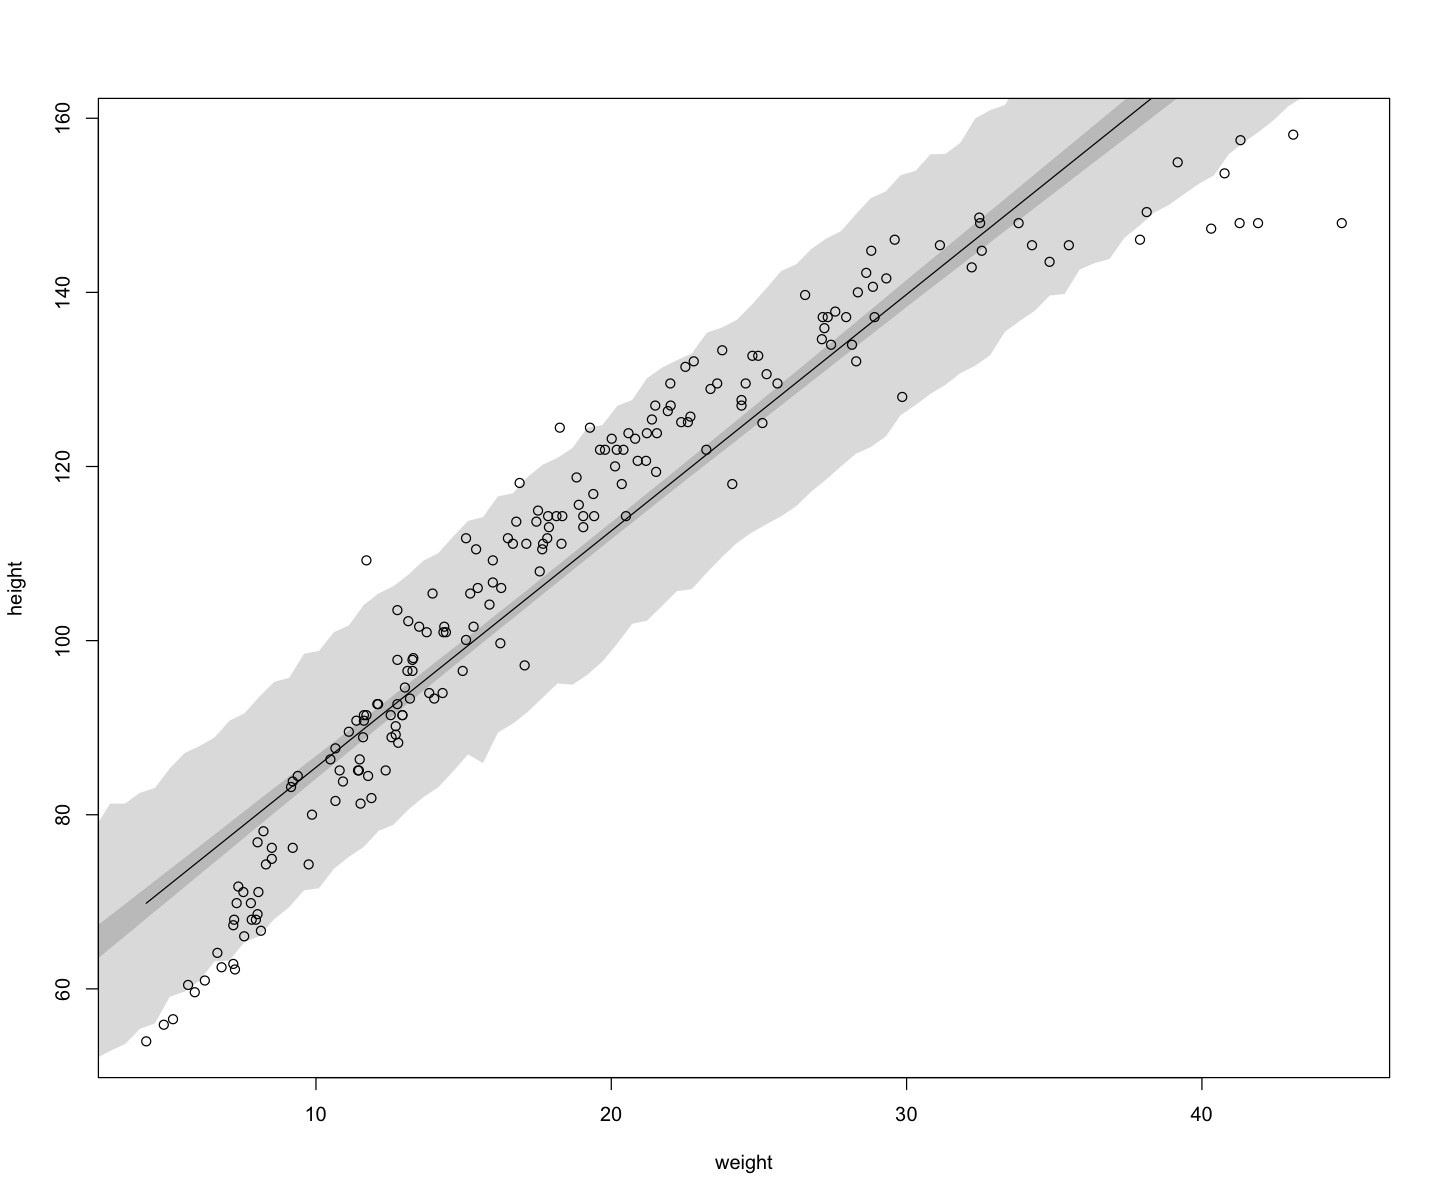

In [184]:
plot(height~weight, data=d3)
curve(a_map + b_map*(x-xbar), add=T)
shade(PI, weight.seq)
shade(pred.PI, weight.seq)

This model is not a good fit to the data, as the relationship between weight and height is not a linear one. The model does bad at predicting both low and high weights. It may also underestimate the true height for the mid-range of weights. A GLM should be a better fit here.

## 4H3

In [189]:
m.4h3 <- quap(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b*log(weight),
        a ~ dnorm(150, 15),
        b ~ dlnorm(0, 1),
        sigma ~ dunif(0, 50)
    ), data = d
)

In [190]:
precis(m.4h3)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-22.406310,1.3342533,-24.538704,-20.273915
b,46.685547,0.3823199,46.074526,47.296568
sigma,5.140021,0.1561502,4.890463,5.389579


In [201]:
post <- extract.samples(m.4h3)
weight.seq <- seq(0, 70, length.out=140)
mu <- link(m.4h3, data=data.frame(weight=weight.seq))
mu.PI <- apply(mu, 2, PI, prob=0.97)
height.sim <- sim(m.4h3, data=list(weight=weight.seq))
height.PI <- apply(height.sim,2,PI, prob=0.7)

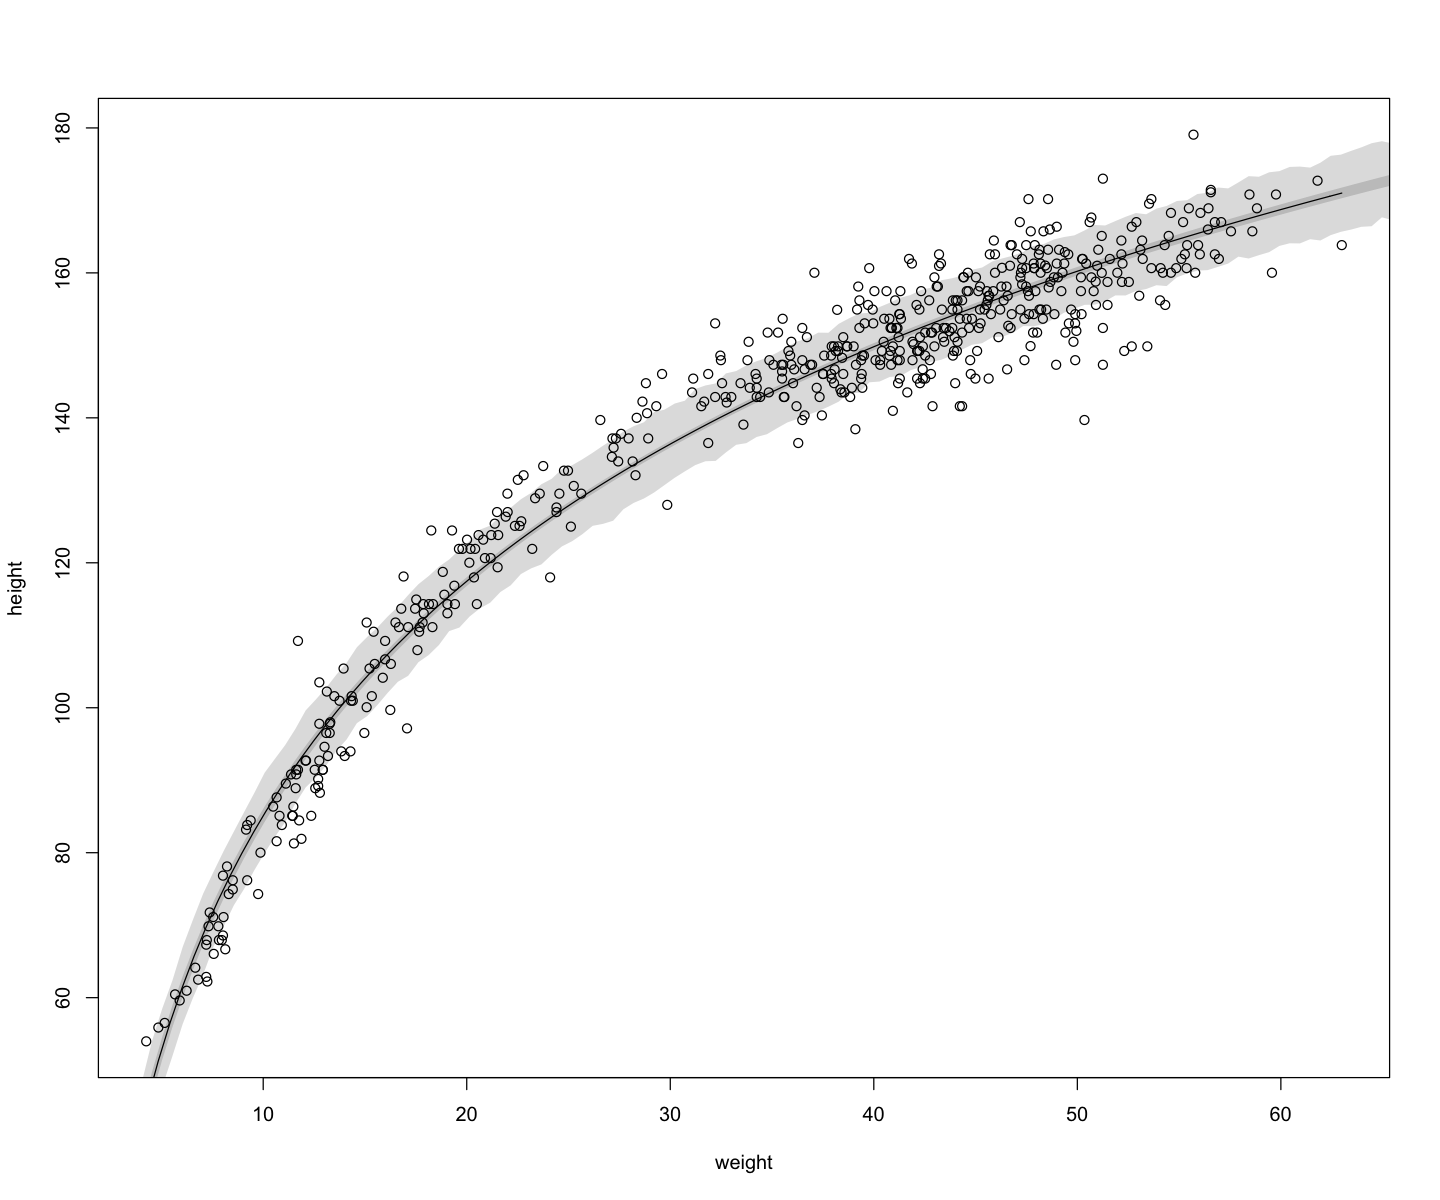

In [202]:
plot(height~weight, d)
curve(mean(post$a) + mean(post$b)*log(x), add=T)
shade(mu.PI, weight.seq)
shade(height.PI, weight.seq)